# Exploratory analysis of stock prices

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/melektapmaz/Documents/Master-Thesis-Information-Management-main/consolidated-data')
df.head()

,Unnamed: 0,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open
0,0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003
1,1,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000
2,2,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.420000,3.600000
3,3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001
4,4,1422892,Beforeyou make a decision to invest in our sec...,2018-02-16,SINO,"Sino-Global Shipping America, Ltd.",2.020000,2.080000


In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003
1,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000
2,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.420000,3.600000
3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001
4,1422892,Beforeyou make a decision to invest in our sec...,2018-02-16,SINO,"Sino-Global Shipping America, Ltd.",2.020000,2.080000


The idea is to take a look at the average stock price trend for each of the stocks, and then compare whether the difference in closing prices is higher than the trend. If so, we can more robustly say that the effect of the filing caused a change in the stock prices. Otherwise, there would be really insignificant fluctuations in prices. 

## Z-Score calculation

In [11]:
import yfinance as yf
import datetime
import scipy.stats as stats

In [12]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CIK Code        236 non-null    int64  
 1   Filing          236 non-null    object 
 2   Date Filed_x    236 non-null    object 
 3   Ticker          236 non-null    object 
 4   CompanyName     236 non-null    object 
 5   Previous close  236 non-null    float64
 6   Next Open       236 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.0+ KB


In [13]:
def zscore(series):
    return (series - series.mean()) / series.std()

In [14]:
df['Previous close']

0      96.529999
1       3.010000
2       3.420000
3      30.250000
4       2.020000
         ...    
231     7.250000
232    24.250000
233     1.140000
234    31.820000
235     2.220000
Name: Previous close, Length: 236, dtype: float64

In [15]:
def get_stats(df, plot = False, tickers = None):
    close_list = list(df['Previous close'])
    ticker_list = list(df['Ticker'])
    data = yf.download(tickers = ticker_list, 
                      period = '3mo')
    names = []
    stds = []
    means = []
    q1 = []
    median = []
    q3 = []
    zscore = []
    plot_data = {}
    fig, (ax, ax2) = plt.subplots(ncols = 2)
    
    
    for i in close_list:
            series = data[df['Close']]['{}'.format(i)]
            zscore.append(zscore(series))
        
    dic = {
        "Ticker": names,
        "Standard deviation": stds,
        "Mean price": means,
        "1st Quartile": q1,
        "Median": median,
        "3rd Quartile": q3,
        "ZScore": zscore
    }
    
    stats = pd.DataFrame(dic)
    plt.show()
    return stats
    

In [16]:
table = yf.download(tickers =['AAPL'], 
                      period = '3mo')


[*********************100%***********************]  1 of 1 completed


In [17]:
def zscore(series):
    return (series - series.mean()) / series.std()

In [18]:
table

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.852966,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,128.787552,100620900
2021-01-12,128.500000,129.690002,126.860001,128.800003,128.607819,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.694702,88636800
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.717667,90221800
...,...,...,...,...,...,...
2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800
2021-04-01,123.660004,124.180000,122.489998,123.000000,123.000000,74957400
2021-04-05,123.870003,126.160004,123.070000,125.900002,125.900002,88651200


In [19]:
close_table = table['Close']

In [20]:
def zscore(series):
    return (series - series.mean()) / series.std()


In [21]:
zscore(table['Close']).head()

Date
2021-01-08    0.580498
2021-01-11    0.127804
2021-01-12    0.101262
2021-01-13    0.409447
2021-01-14    0.117483
Name: Close, dtype: float64

# Z-score (new)

In [5]:
import yfinance as yf
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

In [6]:
ticker_list = list(df['Ticker'])
table = yf.download(tickers =ticker_list, 
                      period = '3mo')

[*********************100%***********************]  119 of 119 completed

2 Failed downloads:
- AMRH: No data found, symbol may be delisted
- SOJA: No data found for this date range, symbol may be delisted


In [7]:
def zscore(series):
    return (series - series.mean()) / series.std()


In [8]:
table

Adj Close                                                       \
                AAOI   ACET        ADC  ADMA  ADMS  AEHL       AEYE  AEZS   
Date                                                                        
2021-01-08       NaN    NaN        NaN   NaN   NaN   NaN        NaN   NaN   
2021-01-11     10.28  13.77  63.661171  2.12  4.67  3.07  25.000000  0.65   
2021-01-12     10.40  13.51  62.096142  2.11  4.56  2.91  25.139999  0.67   
2021-01-13     10.17  13.27  62.611214  2.06  4.46  2.97  23.709999  0.69   
2021-01-14     10.47  13.42  61.759361  2.11  4.53  3.02  25.000000  0.68   
...              ...    ...        ...   ...   ...   ...        ...   ...   
2021-04-01      8.82  13.11  68.089996  1.83  5.15  3.09  28.549999  1.12   
2021-04-05      8.69  12.77  68.839996  1.83  5.18  3.15  27.840000  1.11   
2021-04-06      8.47  13.01  68.690002  1.78  4.94  3.37  28.660000  1.11   
2021-04-07      8.48  12.87  68.239998  1.79  4.67  3.23  28.760000  1.12   
2021-04-08      8.41  12.88  67.989998  1.87  4.59  3.27  29.680000  1.09   

                       ...      Volume                                     \
            AIKI AMRH  ...         SYN        TRCH        UDR         URG   
Date                   ...                                                  
2021-01-08   NaN  NaN  ...         NaN         NaN        NaN         NaN   
2021-01-11  1.18  NaN  ...  21916000.0  15268000.0  1485600.0   1351200.0   
2021-01-12  1.16  NaN  ...  47670600.0   9974300.0  2524600.0   1914600.0   
2021-01-13  1.12  NaN  ...  14997500.0  20668000.0  1291600.0  26674600.0   
2021-01-14  1.18  NaN  ...   8790900.0  10579600.0  2074900.0  26976500.0   
...          ...  ...  ...         ...         ...        ...         ...   
2021-04-01  1.17  NaN  ...   8354300.0   7747000.0  2441300.0   1794300.0   
2021-04-05  1.16  NaN  ...   3849600.0   3809100.0  2368600.0   3642300.0   
2021-04-06  1.14  NaN  ...   2149600.0   4752500.0  2392100.0   1960400.0   
2021-04-07  1.11  NaN  ...   3107800.0   3935900.0  1647900.0   2057000.0   
2021-04-08  1.08  NaN  ...   2259604.0   3658376.0  1158040.0   2526346.0   

                                                                               
                USEG        VISL      VJET      VRME       WTER           ZOM  
Date                                                                           
2021-01-08       NaN         NaN       NaN       NaN        NaN           NaN  
2021-01-11  558100.0   4554300.0   69200.0  148000.0  4161200.0  1.090140e+09  
2021-01-12  554100.0   2068700.0   36600.0   48800.0  1348600.0  9.152556e+08  
2021-01-13  250500.0   6171000.0   97000.0  198600.0   906500.0  4.810493e+08  
2021-01-14  285200.0  28445600.0  125100.0  730500.0  1796000.0  3.174321e+08  
...              ...         ...       ...       ...        ...           ...  
2021-04-01  405500.0   4749900.0   48800.0  163100.0  1254600.0  5.409260e+07  
2021-04-05  102100.0   5698300.0   66300.0   67200.0   878700.0  8.445190e+07  
2021-04-06  493800.0   3214100.0   51200.0   35900.0   733200.0  1.238180e+08  
2021-04-07  102900.0   3199200.0   41200.0   49100.0  1118200.0  5.354620e+07  
2021-04-08  131766.0  17131738.0   33433.0   35783.0  1379030.0  4.420282e+07  

[62 rows x 714 columns]

In [9]:
close_table = table['Close']

In [10]:
def zscore(series):
    return (series - series.mean()) / series.std()


In [11]:
zscore(table['Close']).head()

,AAOI,ACET,ADC,ADMA,ADMS,AEHL,AEYE,AEZS,AIKI,AMRH,...,SYN,TRCH,UDR,URG,USEG,VISL,VJET,VRME,WTER,ZOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11 00:00:00,0.195970,-0.363588,-0.677202,-0.456373,-1.026529,-0.265421,-0.846240,-1.127041,-0.603838,NaN,...,-1.035449,-1.385162,-2.084844,-1.918789,-1.081071,-2.083202,-0.921636,-2.181810,-0.916033,-1.452701
2021-01-12 00:00:00,0.271810,-0.550297,-1.562798,-0.488153,-1.222992,-0.583275,-0.821116,-1.082457,-0.679318,NaN,...,0.708530,-1.401486,-1.879349,-1.702969,-0.725397,-2.096522,-0.927961,-2.116876,-1.104333,-0.763961
2021-01-13 00:00:00,0.126451,-0.722643,-1.271335,-0.647049,-1.401595,-0.464080,-1.077747,-1.037872,-0.830277,NaN,...,-0.125547,-1.189270,-1.571107,0.023587,-0.854733,-1.963320,-0.632789,-0.666669,-1.104333,-1.367074
2021-01-14 00:00:00,0.316050,-0.614927,-1.753369,-0.488153,-1.276573,-0.364751,-0.846240,-1.060164,-0.603838,NaN,...,-0.201372,-1.091323,-1.365613,0.599106,-0.741563,-1.776836,-0.158405,0.004322,-0.727733,-1.303785


/Users/melektapmaz/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/melektapmaz/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


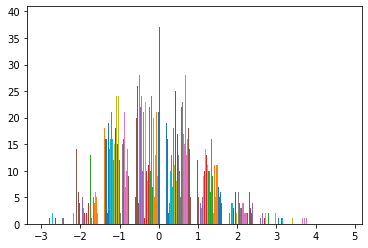

In [12]:
ticker_list = list(df['Ticker'])
zscore_list = zscore(table['Close'])
plt.hist(zscore_list)
plt.show()

## Preparing data

In [23]:
import yfinance as yf
import datetime
import scipy.stats as stats

In [35]:
def get_stats(df, plot = False, tickers = None):
    """ This function retrieves a dataframe that contains the standard deviations and the mean
    of the stock prices for each of the tickers in the dataframe that contains the data.
    If plot = True, the stock prices are plotted for the tickers specified in the arguments.
    This is just a preliminary, very rudamentary way of calculating a significant deviation in
    the price of the stocks."""
    
    ticker_list = list(df['Ticker'])
    data = yf.download(tickers = ticker_list,
                      period = '3mo')
    
    names = []
    stds = []
    means = []
    q1 = []
    median = []
    q3 = []
    zscore = []
    plot_data = {}
    fig, (ax, ax2) = plt.subplots(ncols = 2)
    
    #to collect base summary statistics to base our analysis upon
    for i in ticker_list:
        series = data['Adj Close']['{}'.format(i)]
        if i in tickers:
            plot_data['{}'.format(i)] = series.dropna()
            ax.plot(series, label = '{}'.format(i))
            ax.legend()
    
        names.append(i)
        stds.append(np.nanstd(np.array(series.values)))
        means.append(np.nanmean(np.array(series.values)))
        median.append(np.nanmedian(np.array(series.values)))
        q1.append(np.nanpercentile(np.array(series.values), 25))
        q3.append(np.nanpercentile(np.array(series.values), 75))
    
    if plot == True:
        index = []
        data_b = []
        for i, (key, val) in enumerate(plot_data.items()):
            index.append(key)
            data_b.append(val)
            
        ax2.boxplot(data_b)
        ax2.set_xticklabels(index)
        
    dic = {
        "Ticker": names,
        "Standard deviation": stds,
        "Mean price": means,
        "1st Quartile": q1,
        "Median": median,
        "3rd Quartile": q3,
        "ZScore": zscore
    }
    
    stats = pd.DataFrame(dic)
    plt.show()
    return stats


[*********************100%***********************]  119 of 119 completed

2 Failed downloads:
- AMRH: No data found, symbol may be delisted
- SOJA: No data found for this date range, symbol may be delisted


/Users/melektapmaz/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-35-733e46c1f1e7>:32: RuntimeWarning: Mean of empty slice
  means.append(np.nanmean(np.array(series.values)))
/Users/melektapmaz/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/melektapmaz/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


ValueError: arrays must all be same length

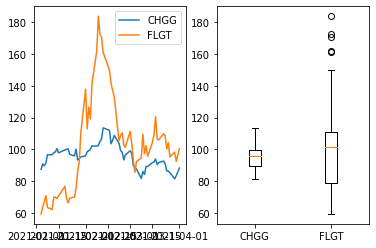

In [36]:
#test
exp1 = get_stats(df, plot = True, tickers = ["CHGG", "FLGT"])
exp1.head()

In [48]:
df = df.merge(exp1, on = "Ticker", how = "left")
df.head()

NameError: name 'exp1' is not defined

In [40]:
df = df[(np.abs(stats.zscore(df.drop(['Date Filed_x'], axis=1))) < 3).all(axis=1)]
# show final size after removing outliers
df.shape

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Determining robust ways to label filing effects

In [ ]:
# to calculate the observed price change
price_delta = []

for i in range(len(df)):
    val = df['Next Open'][i] - df['Previous close'][i]
    price_delta.append(val)
    
df.insert(9, 'Price change', price_delta)


In [51]:
df.drop_duplicates(subset = 'Ticker', keep = 'last', inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)
df.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation_x,Mean price_x,Price change,...,1st Quartile_y,Median_y,3rd Quartile_y,ZScore_y,Standard deviation,Mean price,1st Quartile,Median,3rd Quartile,ZScore
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.766943,95.532903,-0.659996,...,90.404999,95.814999,99.817497,NaN,6.766943,95.532903,90.404999,95.814999,99.817497,NaN
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.224932,100.164596,0.360001,...,70.180000,101.775002,111.157497,NaN,32.224932,100.164596,70.180000,101.775002,111.157497,NaN
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.445110,5.348710,0.230000,...,4.220000,5.545000,6.587500,NaN,1.445110,5.348710,4.220000,5.545000,6.587500,NaN
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,18.008388,256.951563,-0.750000,...,239.837502,260.270004,271.232506,NaN,18.008388,256.951563,239.837502,260.270004,271.232506,NaN
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.651117,25.268387,0.395000,...,23.607500,25.105000,27.487500,NaN,3.651117,25.268387,23.607500,25.105000,27.487500,NaN


In [41]:
# we are going to clone our dataset 3 times to test how unbalanced the resulting datasets are
df_a = df
df_b = df

### Comparing standard deviation against observed price change

In [12]:
labels = []

for i in range(len(df_a)):
    if abs(df_a['Price change'][i]) > abs(df_a['Standard deviation'][i]):
        if df_a['Price change'][i] > 0:
            labels.append('increase')
        else:
            labels.append('decrease')
    else:
        labels.append('neutral')

In [13]:
len(labels)

119

In [14]:
df_a.insert(10, 'Label', labels)
df_a.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,Label,1st Quartile,Median,3rd Quartile
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.770133,95.530806,-0.659996,neutral,90.404999,95.814999,99.817497
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.218752,100.249435,0.360001,neutral,70.180000,101.775002,111.157497
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.442463,5.345647,0.230000,neutral,4.220000,5.545000,6.550000
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,17.926061,256.893821,-0.750000,neutral,239.837502,260.270004,271.232506
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.649783,25.272581,0.395000,neutral,23.607500,25.105000,27.487500


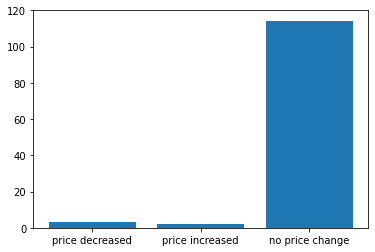

Price increased: 2 times
Price decreased: 3 times
Price did not change: 114 times


In [15]:
incr_counts = 0
neutral_counts = 0
decr_counts = 0

for i in df_a.Label:
    if i == 'neutral':
        neutral_counts += 1
    elif i == 'increase':
        incr_counts += 1

decr_counts = len(df_a) - (neutral_counts + incr_counts)
    
counts = [decr_counts, incr_counts, neutral_counts]
labels = ['price decreased', 'price increased', 'no price change']
plt.bar(labels, counts)
plt.ylim([0, 120])
plt.show()

print('Price increased: {} times'.format(incr_counts))
print('Price decreased: {} times'.format(decr_counts))
print('Price did not change: {} times'.format(neutral_counts))

Using the standard deviation to measure significant stock price deviations will yield an unbalanced dataset. 
Next approach ideas:
 * Calculate IQD and use it to determine outliers, if outlier then determine whether price increased or decreased.

### Outlier detection

#### Using IQD

In [16]:
df_b.drop(columns = 'Label', inplace = True)
df_b.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,1st Quartile,Median,3rd Quartile
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.770133,95.530806,-0.659996,90.404999,95.814999,99.817497
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.218752,100.249435,0.360001,70.180000,101.775002,111.157497
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.442463,5.345647,0.230000,4.220000,5.545000,6.550000
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,17.926061,256.893821,-0.750000,239.837502,260.270004,271.232506
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.649783,25.272581,0.395000,23.607500,25.105000,27.487500


In [17]:
labels_b = []

for i in range(len(df_b)):
    iqr = df_b['3rd Quartile'][i] - df_b['1st Quartile'][i]
    if df_b['Next Open'][i] > (df_b['3rd Quartile'][i]+1.5*iqr):
        labels_b.append('increase')
    elif df_b['Next Open'][i] < (df_b['1st Quartile'][i] - 1.5*iqr):
        labels_b.append('decrease')
    else:
        labels_b.append('neutral')
            

In [18]:
df_b.insert(13, 'Label', labels_b)
df_b.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,1st Quartile,Median,3rd Quartile,Label
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.770133,95.530806,-0.659996,90.404999,95.814999,99.817497,neutral
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.218752,100.249435,0.360001,70.180000,101.775002,111.157497,neutral
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.442463,5.345647,0.230000,4.220000,5.545000,6.550000,neutral
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,17.926061,256.893821,-0.750000,239.837502,260.270004,271.232506,neutral
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.649783,25.272581,0.395000,23.607500,25.105000,27.487500,decrease


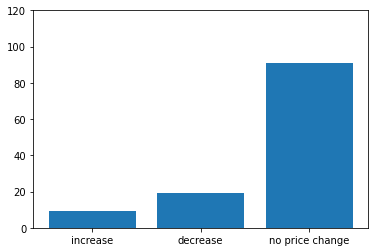

Price increased: 9 times
Price decreased: 19 times
Price did not move: 91 times


In [19]:
incr_counts_b = 0
decr_counts_b = 0
neutral_counts_b = 0
for i in df_b.Label:
    if i == 'increase':
        incr_counts_b += 1
    elif i == 'decrease':
        decr_counts_b += 1

neutral_counts_b = len(df_b) - (incr_counts_b + decr_counts_b)   

counts_b = [incr_counts_b, decr_counts_b, neutral_counts_b]
labels_b = ['increase', 'decrease','no price change']

plt.bar(labels_b, counts_b)
plt.ylim([0,120])
plt.show()

print('Price increased: {} times'.format(incr_counts_b))
print('Price decreased: {} times'.format(decr_counts_b))
print('Price did not move: {} times'.format(neutral_counts_b))


The dataset is still pretty unbalanced using the IQD to detect outliers.